**Name:** Datta, Bishowjit

**ID:** 18-37372-1 

In [1]:

# Kaggle Datasets Access

!pip install -q kaggle


from google.colab import files
files.upload()


! mkdir ~/.kaggle


! cp kaggle.json ~/.kaggle/


! chmod 600 ~/.kaggle/kaggle.json


! kaggle datasets list


!kaggle datasets download -d grassknoted/asl-alphabet

Saving kaggle.json to kaggle.json
ref                                                           title                                              size  lastUpdated          downloadCount  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                   Reddit Vaccine Myths                              232KB  2021-06-27 12:35:43           8383  
crowww/a-large-scale-fish-dataset                             A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5142  
imsparsh/musicnet-dataset                                     MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1750  
promptcloud/careerbuilder-job-listing-2020                    Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52           1169  
coloradokb/dandelionimages    

In [2]:

# Unzipping Datasets

!unzip asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [3]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split

In [5]:
DATA_DIR_TRAIN = '/content/asl_alphabet_train'
DATA_DIR_TEST = '/content/asl_alphabet_test'
TRAIN_DATA_DIR = os.path.join(DATA_DIR_TRAIN, 'asl_alphabet_train')
TEST_DATA_DIR = os.path.join(DATA_DIR_TEST, 'asl_alphabet_test')

In [6]:
IMG_SIZE = 32
CATEGORIES = []

for i in os.listdir(TRAIN_DATA_DIR):
    CATEGORIES.append(i)
    
print(CATEGORIES)

['G', 'O', 'Q', 'Y', 'P', 'C', 'M', 'W', 'X', 'T', 'space', 'R', 'del', 'K', 'nothing', 'A', 'L', 'B', 'Z', 'U', 'E', 'J', 'F', 'D', 'S', 'V', 'N', 'I', 'H']


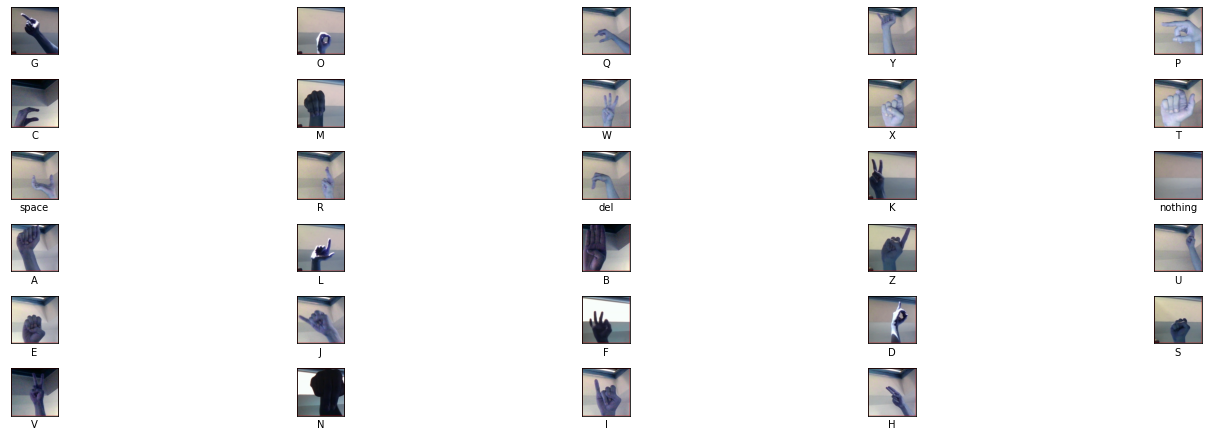

In [7]:
plt.figure(figsize=(20,10))
i=0
for c in CATEGORIES:  
    path = os.path.join(TRAIN_DATA_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(10,5,i+1)
        plt.imshow(img_array)
        plt.xlabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        break

plt.tight_layout()        
plt.show()

In [8]:
def load_data(TRAIN_DATA_DIR):
    images = []
    labels = []
    size = 32,32
    index = -1
    for folder in tqdm(os.listdir(TRAIN_DATA_DIR)):
        index +=1
        for image in tqdm(os.listdir(TRAIN_DATA_DIR + "/" + folder)):
            temp_img = cv2.imread(TRAIN_DATA_DIR + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(index)
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1)
    
    print('Loaded', len(x_train),'images for training,','Train data shape =', x_train.shape)
    print('Loaded', len(x_test),'images for testing','Test data shape =', x_test.shape)
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = load_data(TRAIN_DATA_DIR)

100%|██████████| 29/29 [01:00<00:00,  2.08s/it]


Loaded 78300 images for training, Train data shape = (78300, 32, 32, 3)
Loaded 8700 images for testing Test data shape = (8700, 32, 32, 3)


In [9]:
model = keras.Sequential ([

layers.Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"),
layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),

layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),

layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),

layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),

layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),

layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),


layers.Flatten(),
layers.Dense(units=4096,activation="relu"),
layers.Dense(units=4096,activation="relu"),
layers.Dense(units=29, activation="softmax")

])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [10]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [11]:
h = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.1)

Epoch 1/5
551/551 [==============================] - 68s 64ms/step - loss: 2.4013 - accuracy: 0.2027 - val_loss: 1.5413 - val_accuracy: 0.4503
Epoch 2/5
551/551 [==============================] - 35s 63ms/step - loss: 0.8090 - accuracy: 0.7040 - val_loss: 0.4233 - val_accuracy: 0.8478
Epoch 3/5
551/551 [==============================] - 35s 63ms/step - loss: 0.2822 - accuracy: 0.9008 - val_loss: 0.3324 - val_accuracy: 0.8816
Epoch 4/5
551/551 [==============================] - 35s 63ms/step - loss: 0.1597 - accuracy: 0.9461 - val_loss: 0.1378 - val_accuracy: 0.9497
Epoch 5/5
551/551 [==============================] - 35s 63ms/step - loss: 0.0945 - accuracy: 0.9681 - val_loss: 0.0479 - val_accuracy: 0.9857


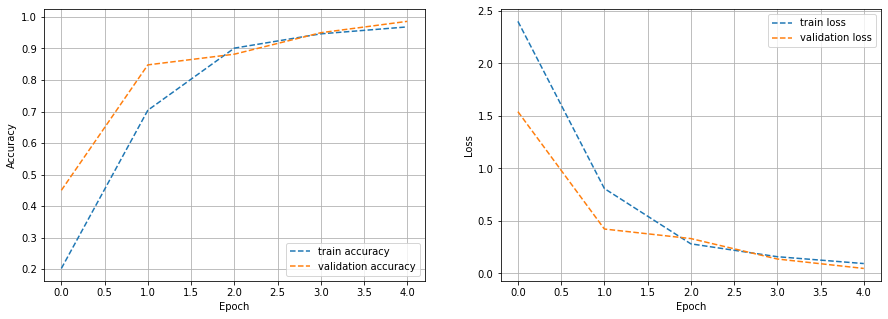

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--', label='train accuracy')
plt.plot(h.history['val_accuracy'], '--', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--', label='train loss')
plt.plot(h.history['val_loss'], '--', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

272/272 [==============================] - 3s 11ms/step - loss: 0.0438 - accuracy: 0.9871

Test Accuracy: 0.9871264100074768

Test Loss: 0.04382896423339844
